# Finite Difference Method

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Consider a second order linear differential equation with boundary conditions

$$
y'' + p(t)y' + q(t)y = r(t) \ \ , \ \ y(t_0) = \alpha \ \ , \ \ y(t_f) = \beta
$$

The [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method) is:

1. Discretize the domain: choose $N$, let $h = (t_f - t_0)/(N+1)$ and define $t_k = t_0 + kh$.
2. Let $y_k \approx y(t_k)$ denote the approximation of the solution at $t_k$.
3. Substitute finite difference formulas into the equation to define an equation at each $t_k$.
4. Rearrange the system of equations into a linear system $A \mathbf{y} = \mathbf{b}$ and solve for
$$
\mathbf{y} = \begin{bmatrix} y_1 & y_2 & \cdots & y_N \end{bmatrix}^T
$$


For example, consider an equation of the form

$$
y'' = r(t) \ \ , \ \ y(t_0) = \alpha \ , \ \ y(t_f) = \beta
$$

Choose $N$, let $h = (t_f - t_0)/(N + 1)$ and Llet $r_k = r(t_k)$. The finite difference method yields the linear system $A \mathbf{y} = \mathbf{b}$ where

$$
A =
\left[ \begin{array}{rrcrr}
-2 & 1 & & & \\
1 & -2 & 1 & & \\
& & \ddots & & \\
& & 1 & -2 & 1 \\
& & & 1 & -2
\end{array} \right]
\hspace{10mm}
\mathbf{b} = 
\begin{bmatrix}
h^2 r_1 - \alpha \\ h^2 r_2 \\ \vdots \\ h^2 r_{N-1} \\ h^2 r_N - \beta
\end{bmatrix}
$$

## Example 1

Plot the approximation for the equation

$$
y'' = -2 \ \ , \ \ y(0) = 0 \ , \ \ y(1) = 0
$$

and compare to the exact solution

$$
y(t) = t - t^2
$$

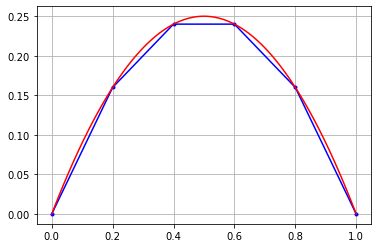

In [2]:
t0 = 0; tf = 1; alpha = 0; beta = 0;
N = 4; h = (tf - t0)/(N + 1)

t = np.linspace(t0,tf,N+2)
r = -2*np.ones(t.size)

A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)

y = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,y,'b.-')

T = np.linspace(t0,tf,100)
Y = T*(1 - T)
plt.plot(T,Y,'r')
plt.grid(True)
plt.show()

## Example 2

Plot the approximation for the equation

$$
y'' = \cos(t) \ \ , \ \ y(0) = 0 \ , \ \ y(2\pi) = 1
$$

and compare to the exact solution

$$
y(t) = 1 - \cos(t) + \frac{t}{2 \pi}
$$

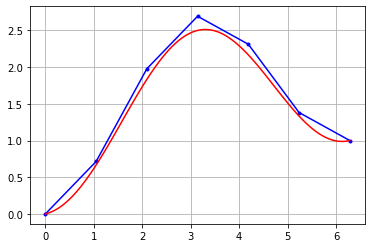

In [3]:
t0 = 0; tf = 2*np.pi; alpha = 0; beta = 1;
N = 5; h = (tf - t0)/(N + 1);

t = np.linspace(t0,tf,N+2)
r = np.cos(t)

A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)

y = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,y,'b.-')

T = np.linspace(t0,tf,100)
Y = 1-np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.grid(True)
plt.show()

## Example 3

Consider a general second order linear ordinary differential equation with boundary conditions

$$
y'' + p(t)y' + q(t)y = r(t) \ \ , \ \ y(t_0) = \alpha \ , \ \ y(t_f) = \beta
$$

Introduce the notation

$$
a_k = 1 - \frac{h p_k}{2}
\hspace{10mm}
b_k = h^2q_k - 2
\hspace{10mm}
c_k = 1 + \frac{h p_k}{2}
$$

The finite difference method yields the linear system $A \mathbf{y} = \mathbf{b}$ where

$$
A =
\left[ \begin{array}{rrcrr}
b_1 & c_1 & & & \\
a_2 & b_2 & c_2 & & \\
& & \ddots & & \\
& & a_{N-1} & b_{N-1} & c_{N-1} \\
& & & a_N & b_N
\end{array} \right]
\hspace{10mm}
\mathbf{b} = 
\begin{bmatrix}
h^2 r_1 - \left( 1 - h p_1/2 \right) \alpha \\ h^2 r_2 \\ \vdots \\ h^2 r_{N-1} \\ h^2 r_N - \left( 1 + h p_N/2 \right) \beta
\end{bmatrix}
$$

Plot the approximation for the equation

$$
y'' + t^2y' + y = \cos(t) \ \ , \ \ y(0) = 0 \ , \ \ y(3) = 0
$$


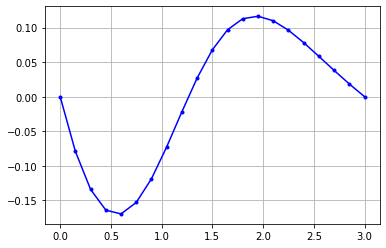

In [4]:
alpha = 0; beta = 0; N = 19;
t0 = 0; tf = 3; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)

p = t**2
q = np.ones(t.size)
r = np.cos(t)

a = 1 - h*p/2
b = h**2*q - 2
c = 1 + h*p/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*r[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

y = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,y,'b.-')
plt.grid(True)
plt.show()